In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv(r"C:\Users\shiva\OneDrive\Desktop\data\website_traffic_sample.csv")
# Check the first few rows
print(df.head())


         date    user_id session_id  session_duration  pages_visited   device  \
0  22-12-2024  user_1396  session_0               198              9   Mobile   
1  15-11-2024  user_1011  session_1               288              8  Desktop   
2  11-01-2025  user_1606  session_2               138              9   Mobile   
3  31-12-2024  user_1301  session_3               186              5   Tablet   
4  21-11-2024  user_1897  session_4               412              2   Tablet   

  traffic_source  is_new_user  bounce landing_page exit_page  conversion  
0       Referral            1       1     /product  /pricing           0  
1        Organic            0       0     /pricing   /signup           0  
2         Social            0       1      /signup     /home           1  
3         Social            1       0     /contact     /blog           0  
4       Referral            0       1     /pricing  /pricing           1  


In [3]:
''' 1. Time Series Analysis: Sessions and Users Over Time
  Steps:
Convert date column to datetime.

Group by date/week/month.

Count unique sessions and users.

Plot with line charts.'''

' 1. Time Series Analysis: Sessions and Users Over Time\n  Steps:\nConvert date column to datetime.\n\nGroup by date/week/month.\n\nCount unique sessions and users.\n\nPlot with line charts.'

In [4]:

df['date'] = pd.to_datetime(df['date'])
df


C:\Users\shiva\AppData\Local\Temp\ipykernel_31872\1860235812.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


,date,user_id,session_id,session_duration,pages_visited,device,traffic_source,is_new_user,bounce,landing_page,exit_page,conversion
0,2024-12-22,user_1396,session_0,198,9,Mobile,Referral,1,1,/product,/pricing,0
1,2024-11-15,user_1011,session_1,288,8,Desktop,Organic,0,0,/pricing,/signup,0
2,2025-01-11,user_1606,session_2,138,9,Mobile,Social,0,1,/signup,/home,1
3,2024-12-31,user_1301,session_3,186,5,Tablet,Social,1,0,/contact,/blog,0
4,2024-11-21,user_1897,session_4,412,2,Tablet,Referral,0,1,/pricing,/pricing,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-12-10,user_1691,session_495,92,5,Mobile,Direct,0,0,/contact,/product,0
496,2025-01-13,user_1718,session_496,41,3,Mobile,Organic,0,1,/pricing,/pricing,0
497,2024-12-13,user_1302,session_497,658,7,Mobile,Referral,0,1,/product,/product,0
498,2024-12-14,user_1638,session_498,934,9,Desktop,Referral,1,0,/signup,/blog,0


In [5]:
# Group daily
daily_summary = df.groupby('date').agg({
    'session_id': 'nunique',
    'user_id': 'nunique'
}).rename(columns={'session_id': 'Sessions', 'user_id': 'Users'})
daily_summary



,Sessions,Users
date,,
2024-11-01,10,10
2024-11-02,11,11
2024-11-03,7,7
2024-11-04,6,6
2024-11-05,3,3
...,...,...
2025-01-25,8,8
2025-01-26,6,6
2025-01-27,6,6


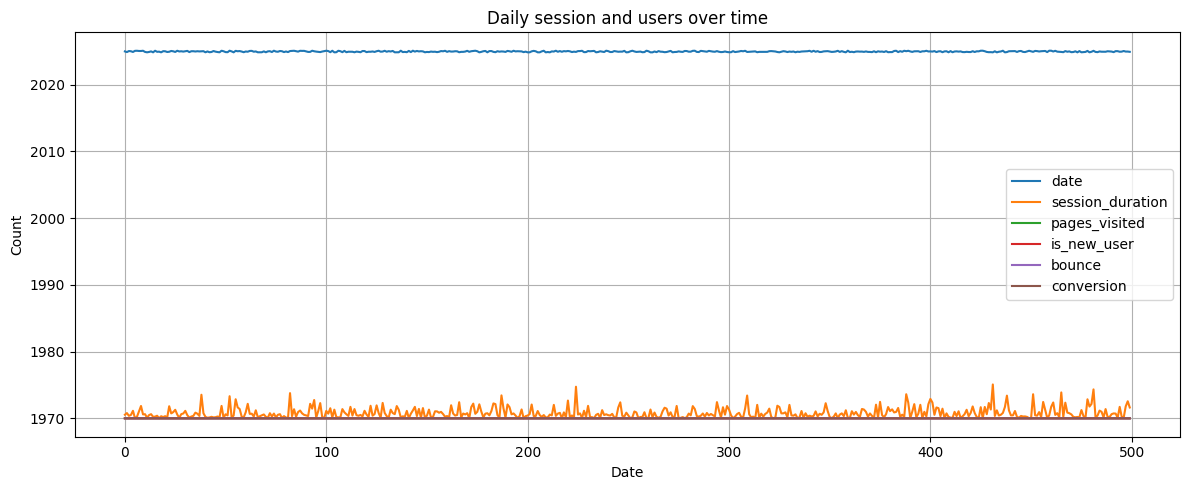

In [6]:
df.plot(figsize=(12,5),title="Daily session and users over time")
df
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
'''✅ 2. Top Marketing Channel by User Count
Goal: Find the channel with the highest number of users.

Group by traffic_source.

Count unique user_ids.

Plot bar chart.'''

'✅ 2. Top Marketing Channel by User Count\nGoal: Find the channel with the highest number of users.\n\nGroup by traffic_source.\n\nCount unique user_ids.\n\nPlot bar chart.'

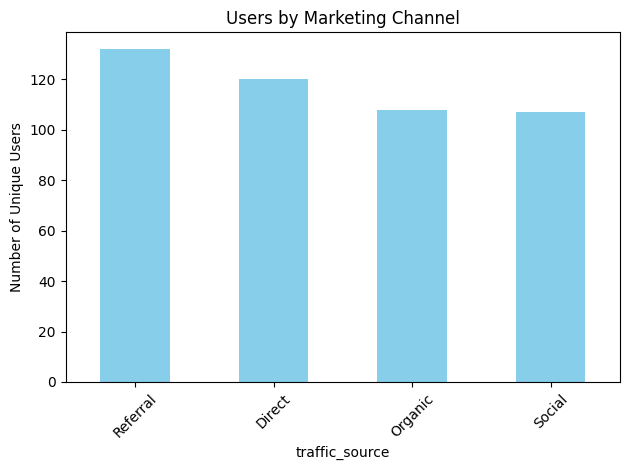

In [8]:
channel_users = df.groupby('traffic_source')['user_id'].nunique().sort_values(ascending=False)
channel_users
channel_users.plot(kind='bar', color='skyblue', title="Users by Marketing Channel")
channel_users
plt.ylabel("Number of Unique Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
'''3.→ Calculate average session durations by channel. Compare content performance.'''

'3.→ Calculate average session durations by channel. Compare content performance.'

In [10]:
avg_session =df.groupby('traffic_source')['session_duration'].mean().sort_values(ascending=False)
avg_session


traffic_source
Direct      305.976190
Referral    294.262411
Social      288.086207
Organic     284.811966
Name: session_duration, dtype: float64

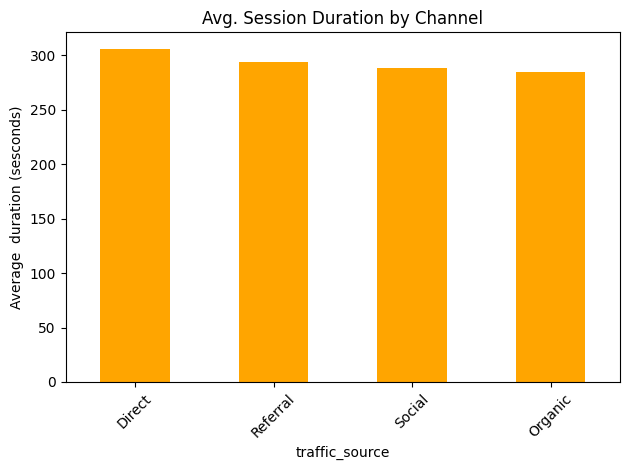

In [11]:
avg_session.plot(kind='bar',color='orange',title='Avg. Session Duration by Channel')
avg_session
plt.ylabel("Average  duration (sesconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
'''4. Engagement Rate by Channel
Goal: Compare how engaging each channel is.

Define Engagement:
Let’s say a session is engaged if:

session_duration > 180 seconds (3 minutes), OR

pages_visited > 3
'''

'4. Engagement Rate by Channel\nGoal: Compare how engaging each channel is.\n\nDefine Engagement:\nLet’s say a session is engaged if:\n\nsession_duration > 180 seconds (3 minutes), OR\n\npages_visited > 3\n'

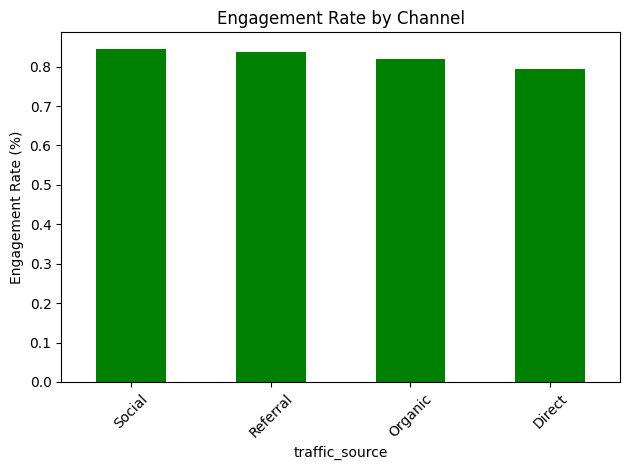

In [13]:
# 4. Define engaged session
df['engaged'] = ((df['session_duration'] > 180) | (df['pages_visited'] > 3)).astype(int)

# Engagement rate = % of engaged sessions
engagement_rate = df.groupby('traffic_source')['engaged'].mean().sort_values(ascending=False)

engagement_rate.plot(kind='bar', color='green', title="Engagement Rate by Channel")
plt.ylabel("Engagement Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
'''5. Engaged vs Non-Engaged Sessions by Channel
Goal: Compare how many engaged vs non-engaged sessions each channel gets.
'''

'5. Engaged vs Non-Engaged Sessions by Channel\nGoal: Compare how many engaged vs non-engaged sessions each channel gets.\n'

         date    user_id session_id  session_duration  pages_visited   device  \
0  22-12-2024  user_1396  session_0               198              9   Mobile   
1  15-11-2024  user_1011  session_1               288              8  Desktop   
2  11-01-2025  user_1606  session_2               138              9   Mobile   
3  31-12-2024  user_1301  session_3               186              5   Tablet   
4  21-11-2024  user_1897  session_4               412              2   Tablet   

  traffic_source  is_new_user  bounce landing_page exit_page  conversion  
0       Referral            1       1     /product  /pricing           0  
1        Organic            0       0     /pricing   /signup           0  
2         Social            0       1      /signup     /home           1  
3         Social            1       0     /contact     /blog           0  
4       Referral            0       1     /pricing  /pricing           1  


C:\Users\shiva\AppData\Local\Temp\ipykernel_31872\1820204980.py:18: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


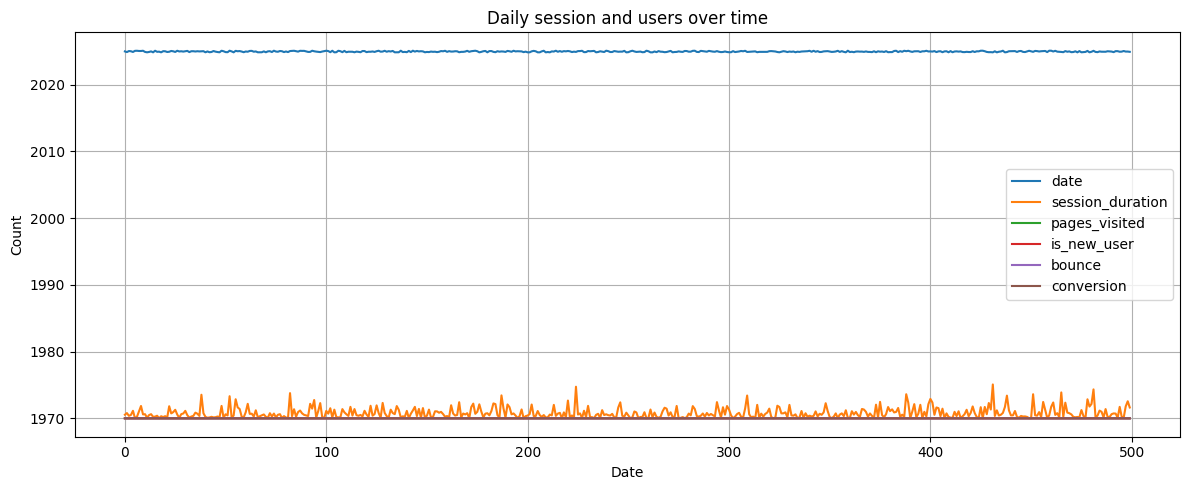

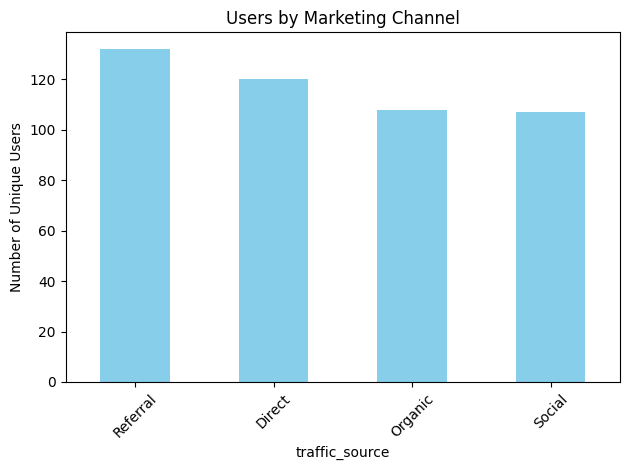

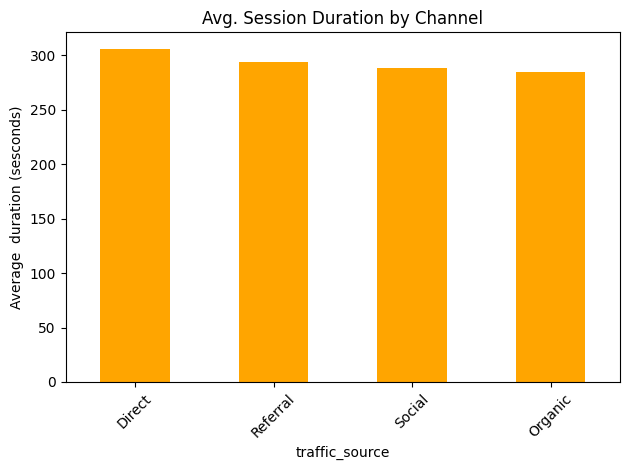

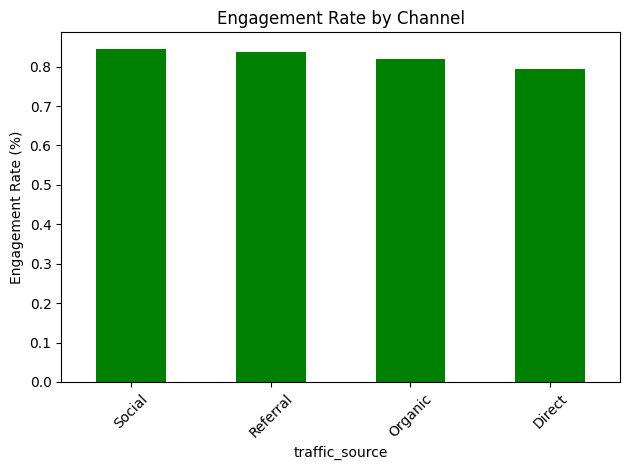

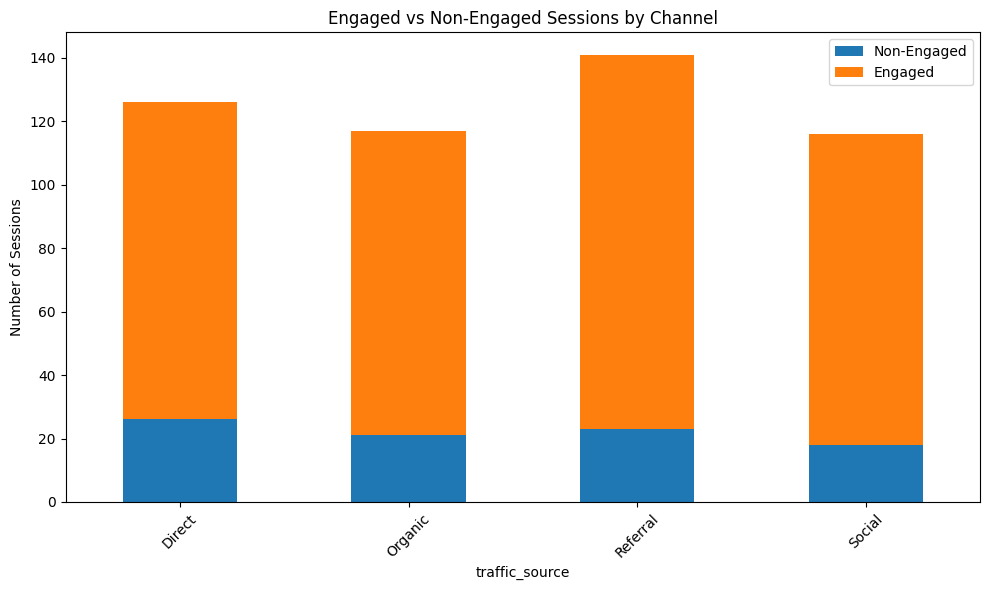

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\shiva\OneDrive\Desktop\data\website_traffic_sample.csv")
# Check the first few rows
print(df.head())

''' 1. Time Series Analysis: Sessions and Users Over Time
  Steps:
Convert date column to datetime.

Group by date/week/month.

Count unique sessions and users.

Plot with line charts.'''

df['date'] = pd.to_datetime(df['date'])
df
# Group daily
daily_summary = df.groupby('date').agg({
    'session_id': 'nunique',
    'user_id': 'nunique'
}).rename(columns={'session_id': 'Sessions', 'user_id': 'Users'})
daily_summary

df.plot(figsize=(12,5),title="Daily session and users over time")
df
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
'''✅ 2. Top Marketing Channel by User Count
Goal: Find the channel with the highest number of users.

Group by traffic_source.

Count unique user_ids.

Plot bar chart.'''
channel_users = df.groupby('traffic_source')['user_id'].nunique().sort_values(ascending=False)
channel_users
channel_users.plot(kind='bar', color='skyblue', title="Users by Marketing Channel")
channel_users
plt.ylabel("Number of Unique Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''3.→ Calculate average session durations by channel. Compare content performance.'''
avg_session =df.groupby('traffic_source')['session_duration'].mean().sort_values(ascending=False)
avg_session

avg_session.plot(kind='bar',color='orange',title='Avg. Session Duration by Channel')
avg_session
plt.ylabel("Average  duration (sesconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''4. Engagement Rate by Channel
Goal: Compare how engaging each channel is.

Define Engagement:
Let’s say a session is engaged if:

session_duration > 180 seconds (3 minutes), OR

pages_visited > 3
'''
# 4. Define engaged session
df['engaged'] = ((df['session_duration'] > 180) | (df['pages_visited'] > 3)).astype(int)

# Engagement rate = % of engaged sessions
engagement_rate = df.groupby('traffic_source')['engaged'].mean().sort_values(ascending=False)

engagement_rate.plot(kind='bar', color='green', title="Engagement Rate by Channel")
plt.ylabel("Engagement Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''5. Engaged vs Non-Engaged Sessions by Channel
Goal: Compare how many engaged vs non-engaged sessions each channel gets.
'''
engagement_split = df.groupby(['traffic_source', 'engaged']).size().unstack().fillna(0)
engagement_split.columns = ['Non-Engaged', 'Engaged']
engagement_split.plot(kind='bar', stacked=True, figsize=(10, 6), title="Engaged vs Non-Engaged Sessions by Channel")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


engagement_split = df.groupby(['traffic_source', 'engaged']).size().unstack().fillna(0)
engagement_split.columns = ['Non-Engaged', 'Engaged']
engagement_split.plot(kind='bar', stacked=True, figsize=(10, 6), title="Engaged vs Non-Engaged Sessions by Channel")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
#6️⃣ Hourly Traffic by Channel (Heatmap)

In [17]:
df['date'] = pd.to_datetime(df['date'])
df

,date,user_id,session_id,session_duration,pages_visited,device,traffic_source,is_new_user,bounce,landing_page,exit_page,conversion,engaged
0,2024-12-22,user_1396,session_0,198,9,Mobile,Referral,1,1,/product,/pricing,0,1
1,2024-11-15,user_1011,session_1,288,8,Desktop,Organic,0,0,/pricing,/signup,0,1
2,2025-01-11,user_1606,session_2,138,9,Mobile,Social,0,1,/signup,/home,1,1
3,2024-12-31,user_1301,session_3,186,5,Tablet,Social,1,0,/contact,/blog,0,1
4,2024-11-21,user_1897,session_4,412,2,Tablet,Referral,0,1,/pricing,/pricing,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-12-10,user_1691,session_495,92,5,Mobile,Direct,0,0,/contact,/product,0,1
496,2025-01-13,user_1718,session_496,41,3,Mobile,Organic,0,1,/pricing,/pricing,0,0
497,2024-12-13,user_1302,session_497,658,7,Mobile,Referral,0,1,/product,/product,0,1
498,2024-12-14,user_1638,session_498,934,9,Desktop,Referral,1,0,/signup,/blog,0,1


In [19]:
''' 2: Define "engaged" sessions
# A session is engaged if:
# - session_duration > 180 seconds OR
# - pages_visited > 3'''
df['engaged'] = ((df['session_duration'] > 180) | (df['pages_visited'] > 3)).astype(int)
df

,date,user_id,session_id,session_duration,pages_visited,device,traffic_source,is_new_user,bounce,landing_page,exit_page,conversion,engaged
0,2024-12-22,user_1396,session_0,198,9,Mobile,Referral,1,1,/product,/pricing,0,1
1,2024-11-15,user_1011,session_1,288,8,Desktop,Organic,0,0,/pricing,/signup,0,1
2,2025-01-11,user_1606,session_2,138,9,Mobile,Social,0,1,/signup,/home,1,1
3,2024-12-31,user_1301,session_3,186,5,Tablet,Social,1,0,/contact,/blog,0,1
4,2024-11-21,user_1897,session_4,412,2,Tablet,Referral,0,1,/pricing,/pricing,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-12-10,user_1691,session_495,92,5,Mobile,Direct,0,0,/contact,/product,0,1
496,2025-01-13,user_1718,session_496,41,3,Mobile,Organic,0,1,/pricing,/pricing,0,0
497,2024-12-13,user_1302,session_497,658,7,Mobile,Referral,0,1,/product,/product,0,1
498,2024-12-14,user_1638,session_498,934,9,Desktop,Referral,1,0,/signup,/blog,0,1


In [23]:
# Step 3: Group by date and calculate:
# - total sessions
# - engagement rate (mean of engaged column)
daily_metrics = df.groupby('date').agg(
    total_sessions=('session_id', 'count'),
    engagement_rate=('engaged', 'mean')
)
daily_metrics

,total_sessions,engagement_rate
date,,
2024-11-01,10,1.000000
2024-11-02,11,0.909091
2024-11-03,7,0.857143
2024-11-04,6,0.666667
2024-11-05,3,0.666667
...,...,...
2025-01-25,8,0.750000
2025-01-26,6,0.833333
2025-01-27,6,0.666667


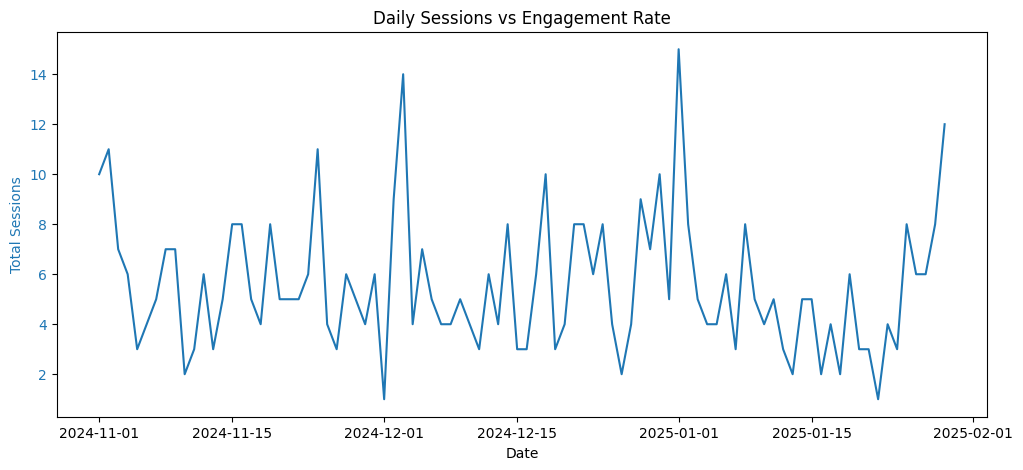

In [27]:
# Step 4: Plot both metrics together using two y-axes
fig, ax1 = plt.subplots(figsize=(12, 5))
# Plot total sessions (left y-axis)
ax1.set_title("Daily Sessions vs Engagement Rate")
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Sessions", color='tab:blue')
ax1.plot(daily_metrics.index, daily_metrics['total_sessions'], color='tab:blue', label="Sessions")
ax1.tick_params(axis='y', labelcolor='tab:blue')

In [36]:
# Plot engagement rate (right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Engagement Rate", color='tab:green')
ax2.plot(daily_metrics.index, daily_metrics['engagement_rate'], color='tab:green', linestyle='--', label="Engagement Rate")
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2
fig.tight_layout()
plt.show()

# Step 5: Calculate correlation between sessions and engagement rate
correlation = daily_metrics['total_sessions'].corr(daily_metrics['engagement_rate'])
print(f"📊 Correlation between sessions and engagement rate: {correlation:.2f}")


📊 Correlation between sessions and engagement rate: 0.15
